In [1]:
import zipfile
z = zipfile.ZipFile("kagglecatsanddogs_5340.zip")
z.extractall()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
from tensorflow.keras.preprocessing.image import load_img
warnings.filterwarnings("ignore")

Create Dataframe  for Input and Output

In [3]:
resimler = []
etiket = []
#listdir() fonksiyonu, bize bir dizin içindeki dosya ve klasörleri listeleme imkanı verir.
for i in os.listdir("PetImages"):
  for j in os.listdir("PetImages/"+i): #PetImages klasörünün içindeki cat ve dog un içine giriyoruz.Burdaki resimlere ulaşıcaz.
    if i ==  "Cat":
      etiket.append(0)
    else:
      etiket.append(1)
    resimler.append(os.path.join("PetImages",i,j)) #join() fonksiyonu, kendisine verilen parametrelerden, ilgili işletim sistemine uygun yol adresleri oluşturur
print(resimler[0],etiket[0])

PetImages\Cat\0.jpg 0


In [4]:
df_resimler = pd.DataFrame(resimler)
df_etiket = pd.DataFrame(etiket)
df = pd.concat([df_resimler,df_etiket],axis=1)
df.columns = ["images","label"]
df.head()



images  label
0     PetImages\Cat\0.jpg      0
1     PetImages\Cat\1.jpg      0
2    PetImages\Cat\10.jpg      0
3   PetImages\Cat\100.jpg      0
4  PetImages\Cat\1000.jpg      0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25002 entries, 0 to 25001
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  25002 non-null  object
 1   label   25002 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


Data Preprocessing

In [6]:
#Klasörde açılmayan veya resim olamayan dosyalar
for i in df["images"]:
  if  i[-4:] != ".jpg":
    print(i)

PetImages\Cat\Thumbs.db
PetImages\Dog\Thumbs.db


In [7]:
import PIL
cöp = []
for i in df["images"]:
    try:
        img = PIL.Image.open(i)
    except:
        cöp.append(i)
cöp

['PetImages\\Cat\\666.jpg',
 'PetImages\\Cat\\Thumbs.db',
 'PetImages\\Dog\\11702.jpg',
 'PetImages\\Dog\\Thumbs.db']

In [8]:
#Açılmayan Dosyaları Silme
for i in cöp:
    df = df[df["images"] != i]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24998 entries, 0 to 25000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  24998 non-null  object
 1   label   24998 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


*All images resized to the same size*

In [12]:
from PIL import Image
import cv2
import os
for index,link in enumerate(df["images"][:12499]):
    images = Image.open(link).convert('RGB')
    images = images.resize((500,500),Image.ANTIALIAS)
    #images.save("Users\ARDA\Desktop\a", str(index)+".jpg")

    dir_path = "C:\\Users\\ARDA\\Desktop\\DL\\PetImages_Resize\\Cat_Resize"    # Cat Resize'ı kaydetmek istediğimiz dosyayı yazıyoruz

    asd = str(index)+".jpg"
    file_path = os.path.join( dir_path, asd  ) 
    images.save( file_path )
for index,link in enumerate(df["images"][12499:]):
    images = Image.open(link).convert('RGB')
    images = images.resize((500,500),Image.ANTIALIAS)
    #images.save("Users\ARDA\Desktop\a", str(index)+".jpg")

    dir_path = "C:\Users\\ARDA\\Desktop\\DL\\PetImages_Resize\\Dog_Resize"    # Dog Resize'ı kaydetmek istediğimiz dosyayı yazıyoruz

    asd = str(index)+".jpg"
    file_path = os.path.join( dir_path, asd  ) 
    images.save( file_path )

# Resize'lı tekrar Dataframe oluşturma

In [17]:
resimler_resize = []
etiket_resize = []
#listdir() fonksiyonu, bize bir dizin içindeki dosya ve klasörleri listeleme imkanı verir.
for i in os.listdir("PetImages_Resize"):
  for j in os.listdir("PetImages_Resize/"+i): #PetImages klasörünün içindeki cat ve dog un içine giriyoruz.Burdaki resimlere ulaşıcaz.
    if i ==  "Cat_Resize":
      etiket_resize.append(0)
    else:
      etiket_resize.append(1)
    resimler_resize.append(os.path.join("PetImages_Resize",i,j)) #join() fonksiyonu, kendisine verilen parametrelerden, ilgili işletim sistemine uygun yol adresleri oluşturur
print(resimler_resize[0],etiket_resize[0])

PetImages_Resize\Cat_Resize\0.jpg 0


In [18]:
df_resimler = pd.DataFrame(resimler_resize)
df_etiket = pd.DataFrame(etiket_resize)
df = pd.concat([df_resimler,df_etiket],axis=1)
df.columns = ["images","label"]
df.head()

images  label
0     PetImages_Resize\Cat_Resize\0.jpg      0
1     PetImages_Resize\Cat_Resize\1.jpg      0
2    PetImages_Resize\Cat_Resize\10.jpg      0
3   PetImages_Resize\Cat_Resize\100.jpg      0
4  PetImages_Resize\Cat_Resize\1000.jpg      0

Visualization

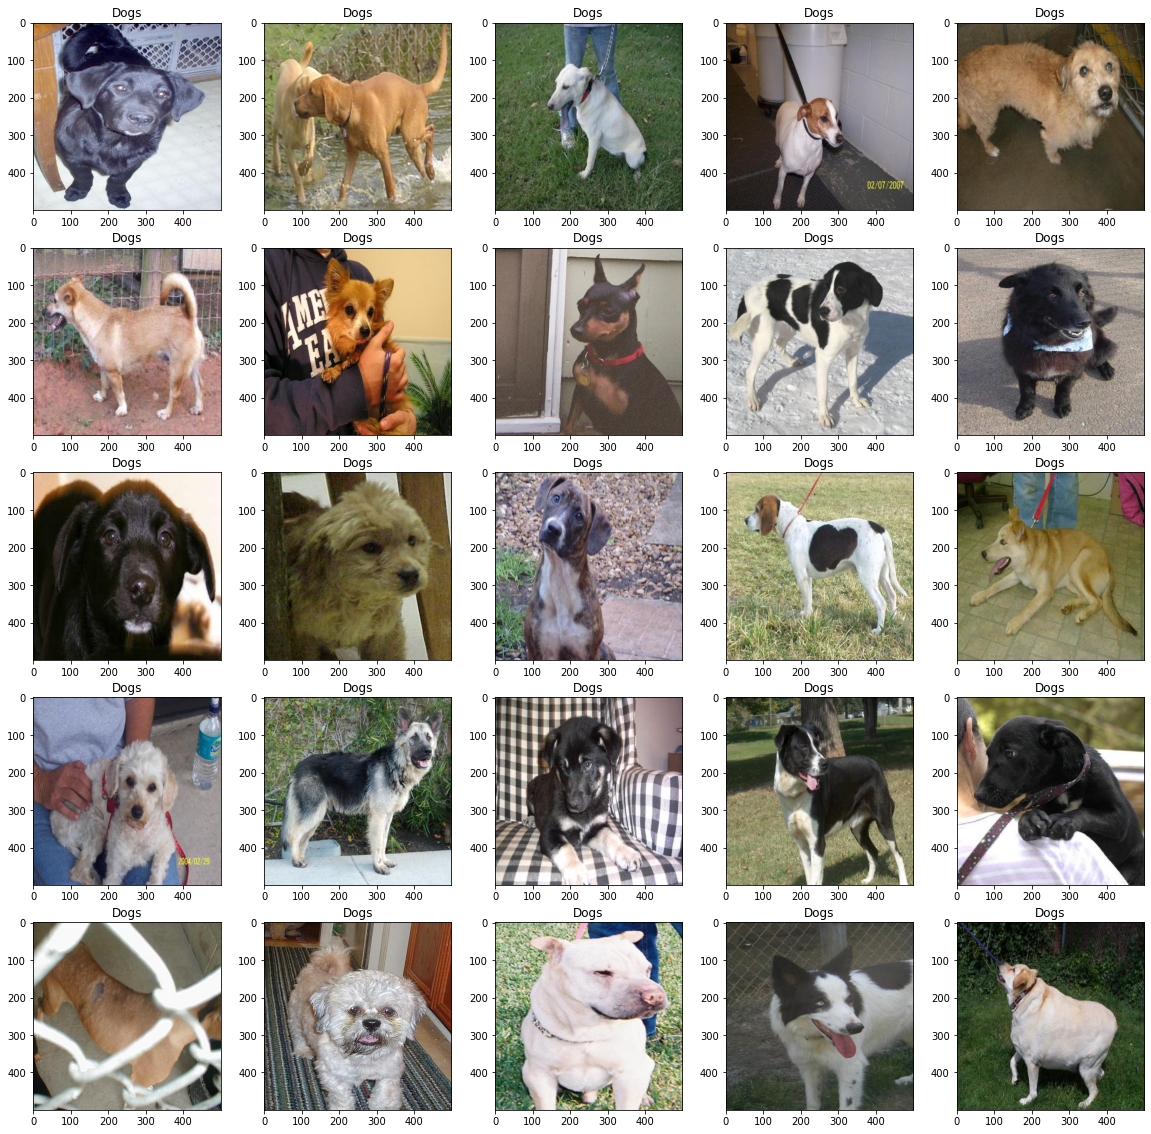

In [20]:
import random
list = []
plt.figure(figsize=(20,20))

dogs = df["images"].loc[df["label"] == 1]
for i in range(25):
    asd = random.randint(12501,25000)
    list.append(df["images"].iloc[asd])
for index,i in enumerate(list):
    plt.subplot(5,5,index+1) #index+1 : o fotoğrafın kaçıncı sıraya yazılacağını belirtiyor
    image = load_img(i)
    plt.imshow(image)
    plt.title("Dogs")
    #plt.axis("off")
    

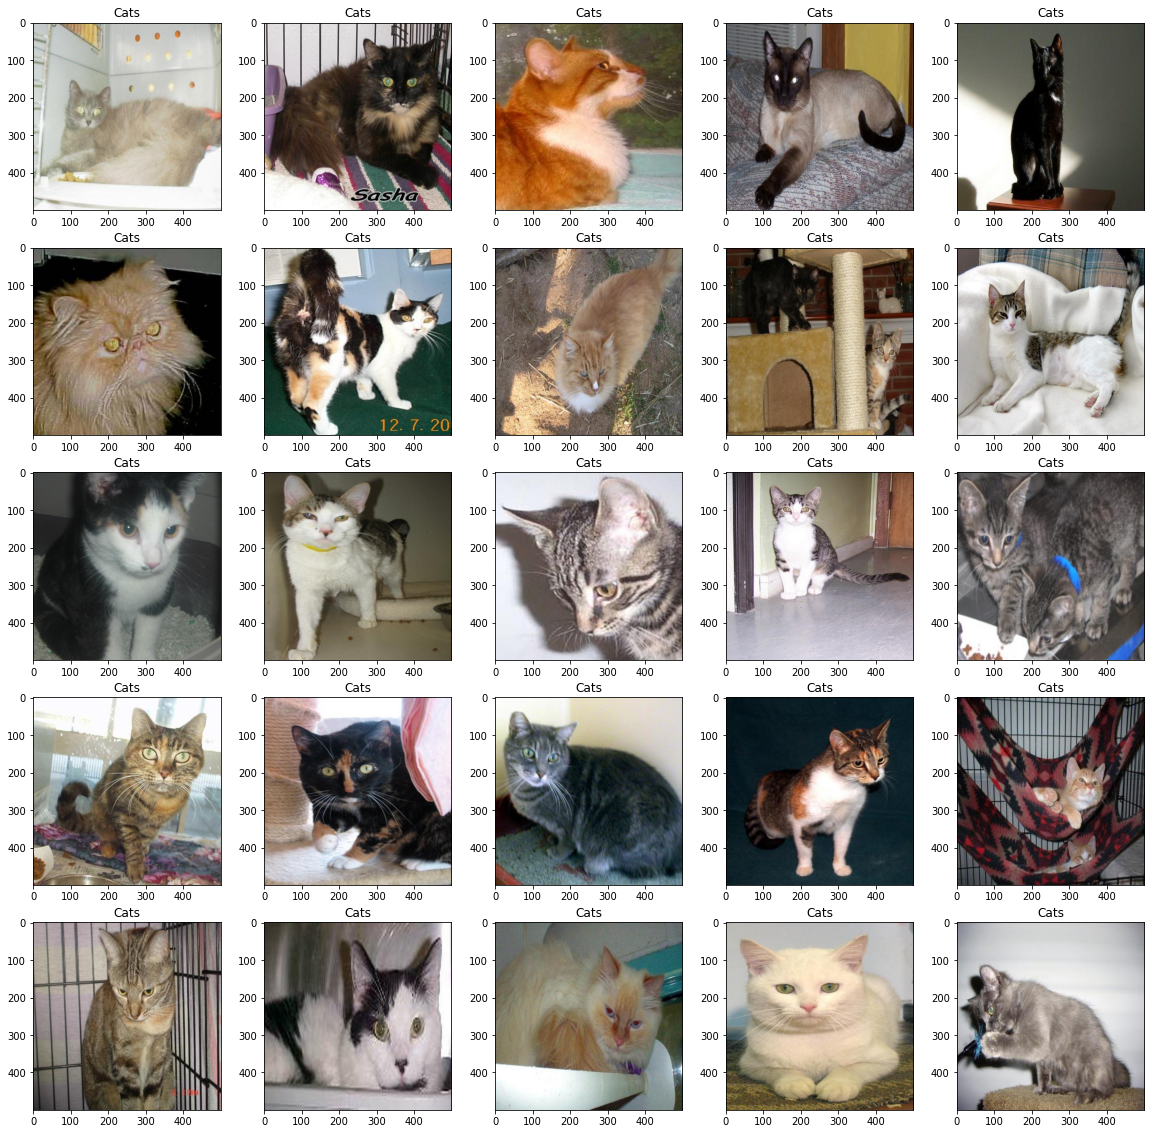

In [22]:
import random
list_2 = []
plt.figure(figsize=(20,20))
cats = df["images"].loc[df["label"] == 0]
for i in range(25):
    asd = random.randint(0,12499)
    list_2.append(df["images"].iloc[asd])

for index,i in enumerate(list_2):
    plt.subplot(5,5,index+1) #index+1 : o fotoğrafın kaçıncı sıraya yazılacağını belirtiyor
    image = load_img(i)
    plt.imshow(image)
    plt.title("Cats")
    #plt.axis("off")

<AxesSubplot:xlabel='label', ylabel='count'>

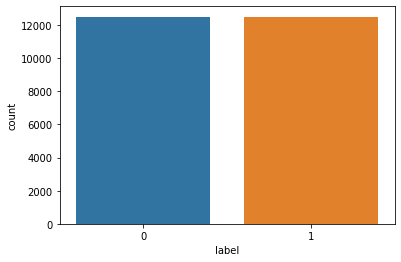

In [23]:
import seaborn as sns
sns.countplot(df["label"])

Modelling

In [24]:
df['label'] = df['label'].astype('str')

In [25]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.33,random_state=42)

In [26]:
from keras.preprocessing.image import ImageDataGenerator
#ImageDataGenerator dökümanından hazır olarak alındı.
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 16748 validated image filenames belonging to 2 classes.
Found 8250 validated image filenames belonging to 2 classes.


Model Creation

In [27]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [29]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
33/33 [==============================] - 710s 22s/step - loss: 0.7318 - accuracy: 0.5295 - val_loss: 0.6636 - val_accuracy: 0.6052
Epoch 2/10
33/33 [==============================] - 288s 9s/step - loss: 0.6464 - accuracy: 0.6207 - val_loss: 0.6392 - val_accuracy: 0.6330
Epoch 3/10
33/33 [==============================] - 247s 7s/step - loss: 0.6049 - accuracy: 0.6659 - val_loss: 0.5898 - val_accuracy: 0.6775
Epoch 4/10
33/33 [==============================] - 245s 7s/step - loss: 0.5671 - accuracy: 0.7064 - val_loss: 0.5537 - val_accuracy: 0.7143
Epoch 5/10
33/33 [==============================] - 248s 7s/step - loss: 0.5480 - accuracy: 0.7208 - val_loss: 0.5258 - val_accuracy: 0.7347
Epoch 6/10
33/33 [==============================] - 247s 7s/step - loss: 0.5235 - accuracy: 0.7393 - val_loss: 0.5146 - val_accuracy: 0.7354
Epoch 7/10
33/33 [==============================] - 252s 8s/step - loss: 0.5104 - accuracy: 0.7454 - val_loss: 0.5122 - val_accuracy: 0.7433
Epoch 8/10
3

Visualization of Result

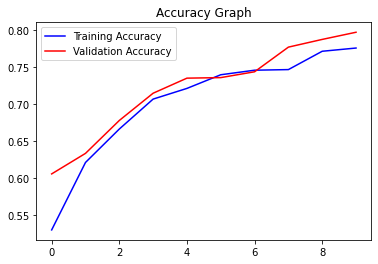

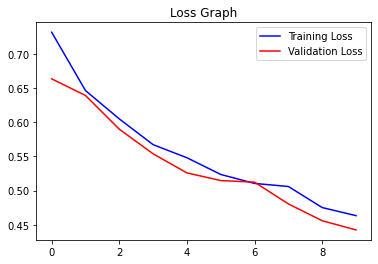

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()